I observed a certain outcome 
 for a variable 
 where variable 
 was set to a value 
. What would have happened to the value of 
, had I intervened on 
 to assign it a different value 
?



In [35]:
import networkx as nx, numpy as np, pandas as pd
from dowhy import gcm

pd.set_option('display.max_rows', 500)

In [2]:
#Treat dataset

#Import data 
# data = pd.read_csv('../datasets/consolidated.csv',header=0, index_col=0)
data = pd.read_csv('../Datasets/Networkwise/consolidated_5s.csv',header=0, index_col=0)
consolidated = pd.DataFrame(data)


consolidated = consolidated.drop(columns=['experiment', 'topology'])#, 'messageBandwidth'])#, 'gossipBandwidth'])#, 'messageDuplicated'])#, 'n_nodes', 'consensus', 'messageDuplicated'])
# consolidated = consolidated.loc[consolidated['totalBandwidth'] > 0]
# consolidated.head(100)

consolidateddiff = consolidated.dropna().dropna()

X = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']].to_numpy()
training_data = consolidateddiff[['d', 'messageReceived', 'graft', 'prune', 'dlo', 'dhi', 'dout', 'messageOverhead', 'topics', 'topicSize']]


training_data.head(500)

,d,messageReceived,graft,prune,dlo,dhi,dout,messageOverhead,topics,topicSize
0,8,43.0,0.0,0.0,6,12,2,321.0,1,16
1,8,54.0,0.0,0.0,6,12,2,389.0,1,16
2,8,96.0,0.0,0.0,6,12,2,702.0,1,16
3,8,88.0,0.0,0.0,6,12,2,629.0,1,16
4,8,61.0,0.0,0.0,6,12,2,454.0,1,16
...,...,...,...,...,...,...,...,...,...,...
495,16,18.0,0.0,0.0,8,20,4,62.0,1,16
496,16,56.0,0.0,0.0,8,20,4,250.0,1,16
497,16,50.0,0.0,0.0,8,20,4,175.0,1,16
498,16,58.0,0.0,0.0,8,20,4,239.0,1,16


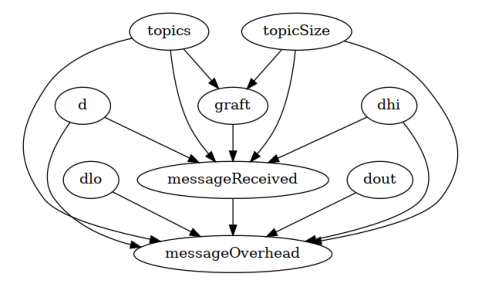

In [3]:
causal_graph = nx.read_adjlist("../1_Discovery/MessageOverhead/AdjLists/pcStable5s.adjlist", create_using=nx.DiGraph)
causal_graph.remove_node('prune')

G=gcm.util.plot(causal_graph, figure_size=[6, 8])

In [4]:
causal_model = gcm.InvertibleStructuralCausalModel(causal_graph) # X -> Y -> Z
gcm.auto.assign_causal_mechanisms(causal_model, training_data)

In [5]:
gcm.fit(causal_model, training_data)

Fitting causal mechanism of node topicSize: 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]      


In [37]:
counterfactual = dict([  ('d', 5),
                         ('dlo', 3),
                         ('dhi', 7),
                         ('dout', 5),
                         ('topics', 5),
                         ('topicSize',7)])

cf_list = np.array(list(counterfactual.items()))
# print(cf_list)
# np.iterable(cf_list)

samples = gcm.counterfactual_samples(
    causal_model,
    {'topicSize': lambda x: 6},
    observed_data=pd.DataFrame(training_data))

samples.head(500)

,d,dlo,dhi,dout,topics,topicSize,graft,messageReceived,messageOverhead
0,8,6,12,2,1,6,1.0,-19.0,-36.0
1,8,6,12,2,1,6,1.0,-8.0,-28.0
2,8,6,12,2,1,6,1.0,34.0,270.0
3,8,6,12,2,1,6,1.0,26.0,168.0
4,8,6,12,2,1,6,1.0,-1.0,-8.0
5,8,6,12,2,1,6,1.0,34.0,254.0
6,8,6,12,2,1,6,1.0,23.0,168.0
7,8,6,12,2,1,6,1.0,23.0,202.0
8,8,6,12,2,1,6,1.0,36.0,307.0
9,8,6,12,2,1,6,1.0,12.0,37.0
